In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import keras
from keras.callbacks import EarlyStopping

In [2]:
import os
from google.colab import drive 
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/
os.chdir('/content/drive/My Drive/CE802')
!pwd

Mounted at /content/drive
/content/drive/My Drive
/content/drive/My Drive/CE802


# **Data Analyzing and Preprocessing**

In [3]:
#Reading and loading train and test data
train_data=pd.read_csv('/content/drive/My Drive/CE802/CE802_P3_Data.csv',sep=',')
test_data=pd.read_csv('/content/drive/My Drive/CE802/CE802_P3_Test.csv',sep=',')

In [4]:
#analyzing training dataset
train_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,11.85,-258.09,-6.95,2557.29,Low,Europe,7.59,-28.22,-259.22,-1578.12,-141.76,9,6,20.19,169.26,1.64,999.41
1,11.99,-169.71,-16.06,2862.87,Low,Rest,2.57,-13.76,-321.80,-1914.16,-165.83,6,6,9.51,6259.05,0.08,0.00
2,3.48,-317.76,-8.14,2175.81,Medium,UK,1.60,-32.76,-253.54,457.12,-203.87,15,10,7.02,38504.82,6.40,266.29
3,14.75,-394.26,-5.61,1927.86,Low,UK,7.33,-13.42,-149.86,-1972.04,-145.52,6,10,33.99,20883.90,21.98,598.77
4,10.25,-365.46,-10.33,3187.98,High,USA,4.37,-32.66,-224.58,-2022.36,-153.94,12,10,4.29,12095.91,2167.48,396.90


In [5]:
#analyzing test dataset
test_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,11.23,-195.54,-1.19,1468.56,Very high,USA,8.97,-23.62,-249.36,-854.18,-155.20,12,10,12.39,-3480.87,0.04,1958.042100
1,14.89,-426.24,-1.18,3049.08,Very high,USA,6.33,-39.26,-226.26,-2126.68,-159.42,9,8,5.19,8831.19,43.68,3018.722000
2,6.76,-493.47,-13.55,3197.13,Very low,USA,1.77,-25.84,-238.30,-2270.78,-212.73,12,10,3.30,-4468.44,0.52,168.268160
3,15.12,-320.04,-12.17,2436.00,Very low,Rest,5.42,-17.32,-203.64,-304.24,-100.34,18,12,6.51,22851.60,758.54,750.828300
4,10.12,-387.99,-7.11,2800.89,Very low,Europe,1.39,-12.78,-265.16,-1419.76,-137.49,0,14,14.22,24396.09,0.68,-21.454248


In [6]:
#Analysing all columns of training dataset
train_data.describe()

,F1,F2,F3,F4,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,10.757127,-336.287880,-7.285153,2671.684440,4.054593,-19.753333,-213.443933,-1334.077107,-158.306867,11.842000,7.885333,12.124980,7073.884980,127.205547,922.082533
std,3.024250,87.920436,3.040026,889.404292,2.906426,8.366284,59.715228,602.841367,42.241393,5.510107,3.620072,8.681726,13329.106617,1548.308592,1092.331874
min,1.330000,-643.650000,-16.990000,-310.650000,0.040000,-52.260000,-450.880000,-3435.840000,-348.810000,0.000000,0.000000,0.120000,-53986.650000,0.000000,0.000000
25%,8.640000,-394.380000,-9.265000,2063.797500,1.907500,-23.710000,-253.540000,-1752.225000,-179.380000,9.000000,6.000000,5.835000,365.310000,0.260000,0.000000
50%,10.760000,-333.870000,-7.390000,2663.205000,3.370000,-19.790000,-213.350000,-1326.910000,-158.245000,12.000000,8.000000,10.245000,7070.715000,2.020000,429.570000
75%,12.880000,-277.350000,-5.330000,3286.702500,5.472500,-15.970000,-171.710000,-932.380000,-138.307500,15.000000,10.000000,16.477500,13207.140000,13.610000,1530.205000
max,19.780000,-67.230000,2.780000,5864.370000,22.570000,35.480000,-3.000000,718.020000,122.660000,33.000000,20.000000,70.170000,66359.040000,54949.060000,3960.010000


In [7]:
#Analysing all columns of test dataset
test_data.describe()

,F1,F2,F3,F4,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,10.844933,-335.864400,-7.172113,2670.249040,3.946733,-19.724933,-214.197640,-1327.886720,-155.672547,11.966000,8.064000,12.036840,7449.409380,185.262587,1194.142566
std,3.019654,91.555052,3.089368,905.304955,2.798770,9.045379,59.709182,608.360357,44.551623,5.479495,3.594698,8.516715,12220.887106,2242.363338,1226.656950
min,1.960000,-666.180000,-18.250000,-218.010000,0.090000,-65.400000,-406.680000,-3710.380000,-365.140000,0.000000,0.000000,0.120000,-68746.650000,0.000000,-100.680910
25%,8.807500,-393.930000,-9.312500,2063.827500,1.880000,-23.945000,-252.905000,-1738.955000,-179.280000,9.000000,6.000000,5.760000,1364.595000,0.240000,141.913887
50%,10.860000,-332.880000,-7.250000,2652.945000,3.320000,-19.640000,-216.170000,-1332.680000,-156.535000,12.000000,8.000000,10.110000,7214.520000,1.800000,766.136175
75%,12.872500,-274.477500,-5.110000,3249.480000,5.342500,-15.500000,-172.955000,-927.510000,-134.277500,15.000000,10.000000,16.477500,13478.160000,14.575000,2050.792300
max,20.460000,-36.450000,2.600000,5874.960000,17.610000,31.240000,-37.400000,638.700000,34.010000,33.000000,20.000000,54.000000,65678.580000,72463.920000,5192.205600


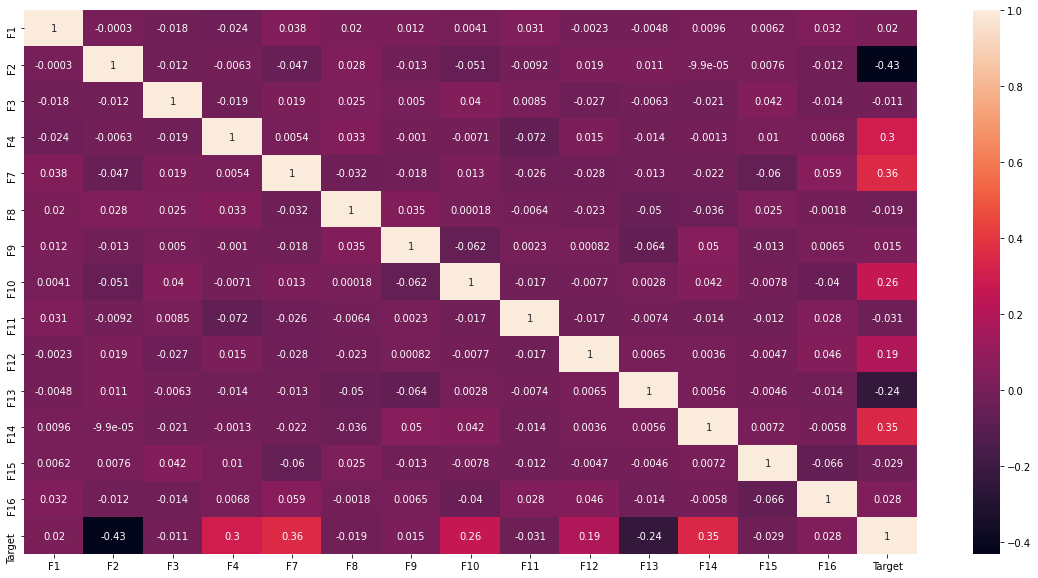

In [8]:
#Plotting Correlation of train data
plt.figure(figsize=(20,10))
correlation=train_data.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

In [9]:
#checking for null values in training dataset
train_data.isnull().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
Target    0
dtype: int64

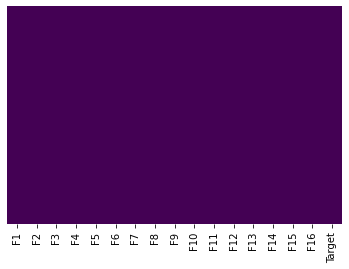

In [10]:
#checking null values in training dataset using heatmap
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [11]:
#Checking Unique value in each column
train_data.nunique()

F1         839
F2        1405
F3         833
F4        1488
F5           5
F6           4
F7         728
F8         905
F9        1399
F10       1492
F11       1411
F12         12
F13         11
F14        737
F15       1500
F16        703
Target    1051
dtype: int64

In [12]:
#Checking object details in training dataset
train_data.describe(include=np.object)

,F5,F6
count,1500,1500
unique,5,4
top,Very low,USA
freq,312,407


In [13]:
#Shape of training dataset
train_data.shape

(1500, 17)

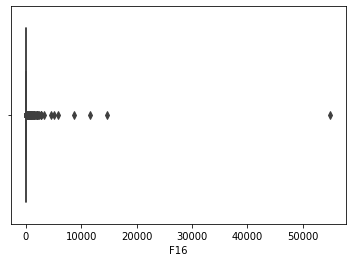

In [14]:
#using boxplot to identify outlier values in training dataset
sns.boxplot(x='F16',data=train_data)

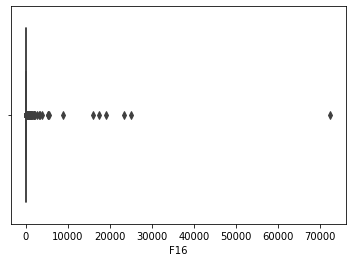

In [15]:
#using boxplot to identify outlier values in test dataset
sns.boxplot(x='F16',data=test_data)

In [16]:
#Droping duplicate rows with different values
train_data.drop_duplicates(subset=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16'])

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,11.85,-258.09,-6.95,2557.29,Low,Europe,7.59,-28.22,-259.22,-1578.12,-141.76,9,6,20.19,169.26,1.64,999.41
1,11.99,-169.71,-16.06,2862.87,Low,Rest,2.57,-13.76,-321.80,-1914.16,-165.83,6,6,9.51,6259.05,0.08,0.00
2,3.48,-317.76,-8.14,2175.81,Medium,UK,1.60,-32.76,-253.54,457.12,-203.87,15,10,7.02,38504.82,6.40,266.29
3,14.75,-394.26,-5.61,1927.86,Low,UK,7.33,-13.42,-149.86,-1972.04,-145.52,6,10,33.99,20883.90,21.98,598.77
4,10.25,-365.46,-10.33,3187.98,High,USA,4.37,-32.66,-224.58,-2022.36,-153.94,12,10,4.29,12095.91,2167.48,396.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,10.76,-334.23,-5.23,2312.88,Very high,Europe,5.76,-30.72,-234.28,-1379.02,-159.49,12,6,19.47,-3117.27,1.66,2369.29
1496,13.86,-239.55,-3.43,2701.47,Very high,UK,3.58,-14.06,-341.86,-961.20,-104.42,18,4,19.23,12181.83,0.14,814.47
1497,8.60,-501.84,-4.61,2650.62,Very low,USA,7.59,-8.64,-253.54,-1545.54,-168.67,12,12,2.73,7133.10,0.28,1692.40
1498,5.44,-354.51,-9.24,2808.60,Very low,UK,4.14,-27.08,-262.86,-809.42,-143.74,18,8,18.36,-34949.13,53.30,635.49


(array([1.495e+03, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([    0.   ,  5494.906, 10989.812, 16484.718, 21979.624, 27474.53 ,
        32969.436, 38464.342, 43959.248, 49454.154, 54949.06 ]),
 <a list of 10 Patch objects>)

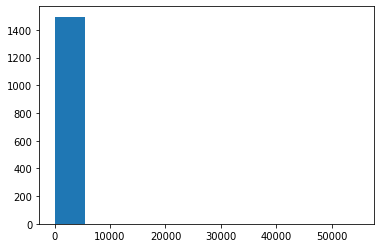

In [17]:
from matplotlib import pyplot as plt
#sample distribution
plt.hist(train_data.F16)

**Outlier detection and replace using 4 SD**

In [18]:
#Finding upper limit using standard deviation
upper_limit = train_data.F16.mean() + 4*train_data.F16.std()
upper_limit

6320.439913423688

In [19]:
#Finding lower limit using standard deviation
lower_limit =train_data.F16.mean() - 4*train_data.F16.std()
lower_limit

-6066.028820090354

In [20]:
#checking outliers
train_data[(train_data.F16>upper_limit) | (train_data.F16<lower_limit)]

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
90,9.58,-417.06,-12.53,2554.23,Very low,UK,3.80,-13.34,-170.06,-2525.76,-77.37,21,6,17.73,14361.63,14658.52,412.32
221,10.88,-328.89,-10.14,2053.83,Very high,Europe,3.24,-25.14,-221.46,-2361.66,-271.76,15,10,16.38,15494.88,8664.18,0.00
536,13.01,-249.81,-5.41,3096.69,Very high,UK,8.86,-20.86,-158.72,-1840.46,-203.72,18,0,15.03,302.76,11550.96,1302.46
1499,14.46,-382.71,-7.48,2642.73,Very low,Europe,10.30,-21.30,-216.46,-1569.92,-89.30,18,8,9.90,-28555.35,54949.06,2277.70


In [21]:
#Training dataset
train_data[train_data.F16 > upper_limit] = train_data.F16.median()
#Test dataset
test_data[test_data.F16 > upper_limit] = test_data.F16.median()

In [22]:
# train_data= train_data.drop(train_data[train_data.F16 > upper_limit].index)
train_data.describe()

,F1,F2,F3,F4,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,10.730560,-335.363513,-7.256060,2664.791507,4.042513,-19.694187,-212.927413,-1328.539853,-157.873380,11.799387,7.874720,12.091007,7072.821087,67.329120,919.426267
std,3.055424,89.575343,3.073402,899.792100,2.901087,8.438427,60.714257,605.219516,42.839577,5.523015,3.626261,8.694925,13298.058169,334.974798,1092.418287
min,1.330000,-643.650000,-16.990000,-310.650000,0.040000,-52.260000,-450.880000,-3435.840000,-348.810000,0.000000,0.000000,0.120000,-53986.650000,0.000000,0.000000
25%,8.630000,-394.350000,-9.252500,2059.837500,1.907500,-23.700000,-253.540000,-1750.185000,-179.240000,9.000000,6.000000,5.760000,279.472500,0.260000,0.000000
50%,10.725000,-333.570000,-7.380000,2662.605000,3.365000,-19.780000,-213.200000,-1323.650000,-158.165000,12.000000,8.000000,10.215000,7061.100000,2.020000,428.220000
75%,12.865000,-276.697500,-5.307500,3286.702500,5.470000,-15.900000,-171.475000,-927.350000,-138.167500,15.000000,10.000000,16.470000,13178.745000,13.195000,1525.855000
max,19.780000,2.020000,2.780000,5864.370000,22.570000,35.480000,2.020000,718.020000,122.660000,33.000000,20.000000,70.170000,66359.040000,5783.840000,3960.010000


In [23]:
#Training dataset-encoding
one_hot_train = pd.get_dummies(train_data['F6'])
#Test dataset-encoding
one_hot_test = pd.get_dummies(test_data['F6'])

In [24]:
#Join the encoded dataframe training dataset
train_data = train_data.join(one_hot_train)
train_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target,2.02,Europe,Rest,UK,USA
0,11.85,-258.09,-6.95,2557.29,Low,Europe,7.59,-28.22,-259.22,-1578.12,-141.76,9.00,6.00,20.19,169.26,1.64,999.41,0,1,0,0,0
1,11.99,-169.71,-16.06,2862.87,Low,Rest,2.57,-13.76,-321.80,-1914.16,-165.83,6.00,6.00,9.51,6259.05,0.08,0.00,0,0,1,0,0
2,3.48,-317.76,-8.14,2175.81,Medium,UK,1.60,-32.76,-253.54,457.12,-203.87,15.00,10.00,7.02,38504.82,6.40,266.29,0,0,0,1,0
3,14.75,-394.26,-5.61,1927.86,Low,UK,7.33,-13.42,-149.86,-1972.04,-145.52,6.00,10.00,33.99,20883.90,21.98,598.77,0,0,0,1,0
4,10.25,-365.46,-10.33,3187.98,High,USA,4.37,-32.66,-224.58,-2022.36,-153.94,12.00,10.00,4.29,12095.91,2167.48,396.90,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,10.76,-334.23,-5.23,2312.88,Very high,Europe,5.76,-30.72,-234.28,-1379.02,-159.49,12.00,6.00,19.47,-3117.27,1.66,2369.29,0,1,0,0,0
1496,13.86,-239.55,-3.43,2701.47,Very high,UK,3.58,-14.06,-341.86,-961.20,-104.42,18.00,4.00,19.23,12181.83,0.14,814.47,0,0,0,1,0
1497,8.60,-501.84,-4.61,2650.62,Very low,USA,7.59,-8.64,-253.54,-1545.54,-168.67,12.00,12.00,2.73,7133.10,0.28,1692.40,0,0,0,0,1
1498,5.44,-354.51,-9.24,2808.60,Very low,UK,4.14,-27.08,-262.86,-809.42,-143.74,18.00,8.00,18.36,-34949.13,53.30,635.49,0,0,0,1,0


In [25]:
# Join the encoded dataframe test dataset
test_data = test_data.join(one_hot_test)
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target,1.8,Europe,Rest,UK,USA
0,11.23,-195.54,-1.19,1468.56,Very high,USA,8.97,-23.62,-249.36,-854.18,-155.20,12.0,10.0,12.39,-3480.87,0.04,1958.042100,0,0,0,0,1
1,14.89,-426.24,-1.18,3049.08,Very high,USA,6.33,-39.26,-226.26,-2126.68,-159.42,9.0,8.0,5.19,8831.19,43.68,3018.722000,0,0,0,0,1
2,6.76,-493.47,-13.55,3197.13,Very low,USA,1.77,-25.84,-238.30,-2270.78,-212.73,12.0,10.0,3.30,-4468.44,0.52,168.268160,0,0,0,0,1
3,15.12,-320.04,-12.17,2436.00,Very low,Rest,5.42,-17.32,-203.64,-304.24,-100.34,18.0,12.0,6.51,22851.60,758.54,750.828300,0,0,1,0,0
4,10.12,-387.99,-7.11,2800.89,Very low,Europe,1.39,-12.78,-265.16,-1419.76,-137.49,0.0,14.0,14.22,24396.09,0.68,-21.454248,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,6.04,-308.37,-12.30,4346.82,High,USA,8.96,-18.28,-266.14,-3132.76,-91.62,9.0,8.0,15.63,-1231.92,8.32,3247.124800,0,0,0,0,1
1496,14.13,-280.62,-6.00,2600.13,Very high,Europe,2.70,-0.80,-101.86,-1305.60,-147.74,18.0,18.0,13.23,7516.71,0.78,109.789140,0,1,0,0,0
1497,13.03,-301.05,-5.22,2279.07,Very low,Rest,0.23,-17.06,-168.30,-1413.06,-102.67,0.0,14.0,8.58,9689.01,4.80,-30.832040,0,0,1,0,0
1498,3.29,-347.40,-7.19,1985.31,Very low,Europe,2.63,-22.20,-299.66,-1183.62,-118.93,6.0,8.0,6.21,-2832.51,0.46,-20.105978,0,1,0,0,0


In [26]:
#droping unwanted columns in training dataset
train_data = train_data.drop({'F6','USA',2.02},axis = 1)

In [27]:
#droping unwanted columns in test dataset
test_data = test_data.drop({'F6','USA','Target',1.8},axis = 1)
test_data

,F1,F2,F3,F4,F5,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Europe,Rest,UK
0,11.23,-195.54,-1.19,1468.56,Very high,8.97,-23.62,-249.36,-854.18,-155.20,12.0,10.0,12.39,-3480.87,0.04,0,0,0
1,14.89,-426.24,-1.18,3049.08,Very high,6.33,-39.26,-226.26,-2126.68,-159.42,9.0,8.0,5.19,8831.19,43.68,0,0,0
2,6.76,-493.47,-13.55,3197.13,Very low,1.77,-25.84,-238.30,-2270.78,-212.73,12.0,10.0,3.30,-4468.44,0.52,0,0,0
3,15.12,-320.04,-12.17,2436.00,Very low,5.42,-17.32,-203.64,-304.24,-100.34,18.0,12.0,6.51,22851.60,758.54,0,1,0
4,10.12,-387.99,-7.11,2800.89,Very low,1.39,-12.78,-265.16,-1419.76,-137.49,0.0,14.0,14.22,24396.09,0.68,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,6.04,-308.37,-12.30,4346.82,High,8.96,-18.28,-266.14,-3132.76,-91.62,9.0,8.0,15.63,-1231.92,8.32,0,0,0
1496,14.13,-280.62,-6.00,2600.13,Very high,2.70,-0.80,-101.86,-1305.60,-147.74,18.0,18.0,13.23,7516.71,0.78,1,0,0
1497,13.03,-301.05,-5.22,2279.07,Very low,0.23,-17.06,-168.30,-1413.06,-102.67,0.0,14.0,8.58,9689.01,4.80,0,1,0
1498,3.29,-347.40,-7.19,1985.31,Very low,2.63,-22.20,-299.66,-1183.62,-118.93,6.0,8.0,6.21,-2832.51,0.46,1,0,0


In [28]:
#categorical values
cleanup_train = {"F5": {"Very low": 0, "Low": 1, "Medium": 2,"High":3,"Very high":4}}
train_data.replace(cleanup_train, inplace = True)
train_data

,F1,F2,F3,F4,F5,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target,Europe,Rest,UK
0,11.85,-258.09,-6.95,2557.29,1.00,7.59,-28.22,-259.22,-1578.12,-141.76,9.00,6.00,20.19,169.26,1.64,999.41,1,0,0
1,11.99,-169.71,-16.06,2862.87,1.00,2.57,-13.76,-321.80,-1914.16,-165.83,6.00,6.00,9.51,6259.05,0.08,0.00,0,1,0
2,3.48,-317.76,-8.14,2175.81,2.00,1.60,-32.76,-253.54,457.12,-203.87,15.00,10.00,7.02,38504.82,6.40,266.29,0,0,1
3,14.75,-394.26,-5.61,1927.86,1.00,7.33,-13.42,-149.86,-1972.04,-145.52,6.00,10.00,33.99,20883.90,21.98,598.77,0,0,1
4,10.25,-365.46,-10.33,3187.98,3.00,4.37,-32.66,-224.58,-2022.36,-153.94,12.00,10.00,4.29,12095.91,2167.48,396.90,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,10.76,-334.23,-5.23,2312.88,4.00,5.76,-30.72,-234.28,-1379.02,-159.49,12.00,6.00,19.47,-3117.27,1.66,2369.29,1,0,0
1496,13.86,-239.55,-3.43,2701.47,4.00,3.58,-14.06,-341.86,-961.20,-104.42,18.00,4.00,19.23,12181.83,0.14,814.47,0,0,1
1497,8.60,-501.84,-4.61,2650.62,0.00,7.59,-8.64,-253.54,-1545.54,-168.67,12.00,12.00,2.73,7133.10,0.28,1692.40,0,0,0
1498,5.44,-354.51,-9.24,2808.60,0.00,4.14,-27.08,-262.86,-809.42,-143.74,18.00,8.00,18.36,-34949.13,53.30,635.49,0,0,1


In [29]:
#categorical data
cleanup_test = {"F5": {"Very low": 0, "Low": 1, "Medium": 2,"High":3,"Very high":4}}
test_data.replace(cleanup_test, inplace = True)
test_data

,F1,F2,F3,F4,F5,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Europe,Rest,UK
0,11.23,-195.54,-1.19,1468.56,4.0,8.97,-23.62,-249.36,-854.18,-155.20,12.0,10.0,12.39,-3480.87,0.04,0,0,0
1,14.89,-426.24,-1.18,3049.08,4.0,6.33,-39.26,-226.26,-2126.68,-159.42,9.0,8.0,5.19,8831.19,43.68,0,0,0
2,6.76,-493.47,-13.55,3197.13,0.0,1.77,-25.84,-238.30,-2270.78,-212.73,12.0,10.0,3.30,-4468.44,0.52,0,0,0
3,15.12,-320.04,-12.17,2436.00,0.0,5.42,-17.32,-203.64,-304.24,-100.34,18.0,12.0,6.51,22851.60,758.54,0,1,0
4,10.12,-387.99,-7.11,2800.89,0.0,1.39,-12.78,-265.16,-1419.76,-137.49,0.0,14.0,14.22,24396.09,0.68,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,6.04,-308.37,-12.30,4346.82,3.0,8.96,-18.28,-266.14,-3132.76,-91.62,9.0,8.0,15.63,-1231.92,8.32,0,0,0
1496,14.13,-280.62,-6.00,2600.13,4.0,2.70,-0.80,-101.86,-1305.60,-147.74,18.0,18.0,13.23,7516.71,0.78,1,0,0
1497,13.03,-301.05,-5.22,2279.07,0.0,0.23,-17.06,-168.30,-1413.06,-102.67,0.0,14.0,8.58,9689.01,4.80,0,1,0
1498,3.29,-347.40,-7.19,1985.31,0.0,2.63,-22.20,-299.66,-1183.62,-118.93,6.0,8.0,6.21,-2832.51,0.46,1,0,0


In [30]:
#target data and features seprating 
from sklearn.model_selection import train_test_split

X = train_data.loc[:, train_data.columns != 'Target']
y = train_data.loc[:, train_data.columns == 'Target']

In [31]:
#Normalisation of features
inputScaler = MinMaxScaler()
inputScaler.fit(X)
X = inputScaler.transform(X)
X_norm= pd.DataFrame(X)
# outputScaler = MinMaxScaler()
# outputScaler.fit(y)
# y = outputScaler.transform(y)
# y_norm= pd.DataFrame(y)

In [32]:
#splitting training and testing data
X_train,X_test,y_train,y_test=train_test_split(X_norm,y,test_size=0.25,random_state=0)

In [33]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [34]:
X_train.shape

(1125, 18)

# **Artificial Neural Network**

In [35]:
#Importing Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

#Initialising the ANN
classifier = Sequential()

#Adding the input layer with 18 neurons and the first hidden layer with 50 neurons
classifier.add(Dense(50,activation='relu',input_dim = 18))

#Adding the second hidden layer with 25 neurons
classifier.add(Dense(25, activation='relu'))

#Adding the third hidden layer with 50 neurons
classifier.add(Dense( 50, activation='relu'))

#Adding the output layer
classifier.add(Dense( 1))

#Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

#Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,epochs=600)

Epoch 1/600
36/36 [==============================] - 14s 2ms/step - loss: 1369.2697
Epoch 2/600
36/36 [==============================] - 0s 2ms/step - loss: 1432.0606
Epoch 3/600
36/36 [==============================] - 0s 2ms/step - loss: 1418.8146
Epoch 4/600
36/36 [==============================] - 0s 1ms/step - loss: 1387.9778
Epoch 5/600
36/36 [==============================] - 0s 2ms/step - loss: 1416.0793
Epoch 6/600
36/36 [==============================] - 0s 1ms/step - loss: 1366.5860
Epoch 7/600
36/36 [==============================] - 0s 1ms/step - loss: 1343.1998
Epoch 8/600
36/36 [==============================] - 0s 1ms/step - loss: 1291.8632
Epoch 9/600
36/36 [==============================] - 0s 1ms/step - loss: 1214.2944
Epoch 10/600
36/36 [==============================] - 0s 1ms/step - loss: 1152.5814
Epoch 11/600
36/36 [==============================] - 0s 1ms/step - loss: 1119.8197
Epoch 12/600
36/36 [==============================] - 0s 1ms/step - loss: 1093.3481


In [36]:
#prediction and check performance metrics
train_predict=classifier.predict(X_train)
test_predict=classifier.predict(X_test)

In [37]:
#Calculating RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_predict,y_train))

82.15031655958725

In [38]:
#calculating R2 score
r2_score(y_test, test_predict)

0.9894934281706325

In [39]:
#calculating matrics- MAE MSE RMSE
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_predict)))

Mean Absolute Error: 49.88088684914907
Mean Squared Error: 11953.14460248766
Root Mean Squared Error: 109.33043767628327


# **Linear Regression**

In [40]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#Building LinearRegression model 
regressor=  linear_model.LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
#Prediction of test data
y_pred= regressor.predict(X_test)  
y_pred

array([[ 1.61809716e+03],
       [ 1.40662416e+03],
       [-1.19842764e+03],
       [ 1.83341808e+03],
       [ 1.72559825e+03],
       [ 5.66503802e+02],
       [ 6.10101569e+02],
       [ 4.18352012e+02],
       [ 6.07840629e+02],
       [ 2.04351345e+03],
       [ 3.77006745e+02],
       [ 9.99453782e+02],
       [ 5.01793615e+02],
       [ 4.15629801e+02],
       [ 3.74071406e+03],
       [ 2.39593314e+02],
       [ 1.58658186e+03],
       [ 2.59879931e+03],
       [ 6.00472309e+02],
       [ 1.60807040e+02],
       [ 1.56372152e+03],
       [ 1.16108188e+03],
       [ 2.64343158e+03],
       [-2.98946672e+02],
       [-5.96438144e+01],
       [ 6.86152804e+02],
       [ 1.96304359e+03],
       [ 1.62145524e+02],
       [ 2.41383980e+02],
       [ 1.74632880e+03],
       [ 8.13661926e+02],
       [-4.62254055e+02],
       [ 9.37663735e+02],
       [ 8.34320057e+02],
       [ 3.85262729e+02],
       [ 4.95051573e+02],
       [ 5.61645906e+02],
       [ 2.21510122e+03],
       [ 1.2

In [42]:
#calculating matrics- MAE MSE RMSE
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test.values, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test.values, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test.values, y_pred)))

Mean Absolute Error: 380.54113672910853
Mean Squared Error: 256866.0487310299
Root Mean Squared Error: 506.8195425701636


In [43]:
#calculating R2 score
LinearRegression
r2_score(y_test, y_pred)

0.7742199495389075

In [44]:
y_pred

array([[ 1.61809716e+03],
       [ 1.40662416e+03],
       [-1.19842764e+03],
       [ 1.83341808e+03],
       [ 1.72559825e+03],
       [ 5.66503802e+02],
       [ 6.10101569e+02],
       [ 4.18352012e+02],
       [ 6.07840629e+02],
       [ 2.04351345e+03],
       [ 3.77006745e+02],
       [ 9.99453782e+02],
       [ 5.01793615e+02],
       [ 4.15629801e+02],
       [ 3.74071406e+03],
       [ 2.39593314e+02],
       [ 1.58658186e+03],
       [ 2.59879931e+03],
       [ 6.00472309e+02],
       [ 1.60807040e+02],
       [ 1.56372152e+03],
       [ 1.16108188e+03],
       [ 2.64343158e+03],
       [-2.98946672e+02],
       [-5.96438144e+01],
       [ 6.86152804e+02],
       [ 1.96304359e+03],
       [ 1.62145524e+02],
       [ 2.41383980e+02],
       [ 1.74632880e+03],
       [ 8.13661926e+02],
       [-4.62254055e+02],
       [ 9.37663735e+02],
       [ 8.34320057e+02],
       [ 3.85262729e+02],
       [ 4.95051573e+02],
       [ 5.61645906e+02],
       [ 2.21510122e+03],
       [ 1.2

# **Ranadom Forest Regressor**

In [45]:
from sklearn.ensemble import RandomForestRegressor
# X, y = make_regression(n_features=18, n_informative=2,random_state=0, shuffle=False)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [46]:
#building random forest regressor
regr = RandomForestRegressor( random_state=0, n_estimators=100,max_depth=10)

In [47]:
#Trainig data
regr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [48]:
#Predicting test data
y_pred=regr.predict(X_test)
y_pred

array([1447.4680603 ,  446.57180746,   62.11701323, 1594.61480249,
       2217.00879366,  280.45594988,  156.51952307,  113.89577162,
        730.35733863, 1653.76354486,  318.7127275 ,  179.68625762,
       1084.35835625,  121.63616926, 2830.32257971, 1263.92798326,
       1638.83510938, 2432.826962  ,  649.72656684,  310.15986903,
       1471.70515766,  213.60712931, 2195.6259703 ,   45.89676186,
        232.621959  , 1235.29391397, 1974.80549685,  702.80744939,
        161.9056346 , 1215.73900318,  942.59592152,  289.62385054,
       1770.32835297,  536.27720046, 1669.34680965,  753.46991312,
         51.36610367, 1986.21204898,  183.57837654,  491.09517774,
       1077.06441105, 2052.18771685, 2514.75531705, 1164.02605758,
       2363.84785775, 1657.13410668,  774.13340803,  734.82407584,
        126.07665191,  392.62171023, 1594.35908481,  379.14919048,
       1766.72255382,  153.77620084,   62.11701323,  451.79126036,
        905.32686836, 1562.76078861, 2001.92038783, 2152.11460

In [49]:
#prediction training data
regr.score(X_train, y_train)

0.9420814540647169

In [50]:
#prediction test data
regr.score(X_test, y_test)

0.6817399605363359

In [51]:
#calculating R2 score
r2_score(y_test, y_pred)

0.6817399605363358

In [52]:
#matrics- MAE MSE RMSE
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 443.00073055266824
Mean Squared Error: 362078.9287585914
Root Mean Squared Error: 601.7299467024983


# **Test Data Prediction**

In [53]:
#normalising test data 
inputScaler = MinMaxScaler()
inputScaler.fit(test_data)
X1 = inputScaler.transform(test_data)
X_norm_test= pd.DataFrame(X1)

X_norm_test.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.482403,0.496671,0.533207,0.471814,0.496267,0.219604,0.473634,0.473562,0.549422,0.526471,0.361224,0.402220,0.220026,0.566737,0.011797,0.243333,0.245333,0.256000
std,0.164889,0.141133,0.150822,0.151203,0.356895,0.159748,0.094544,0.150403,0.140737,0.114327,0.167089,0.180606,0.158103,0.090895,0.062044,0.429238,0.430428,0.436567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.373928,0.407572,0.428777,0.372405,0.250000,0.100742,0.429377,0.376824,0.454838,0.465984,0.272727,0.300000,0.103007,0.520491,0.000044,0.000000,0.000000,0.000000
50%,0.483387,0.499753,0.529017,0.469970,0.500000,0.183505,0.473924,0.466657,0.547104,0.522961,0.363636,0.400000,0.184577,0.564836,0.000332,0.000000,0.000000,0.000000
75%,0.592846,0.587241,0.631775,0.567940,0.750000,0.299087,0.516608,0.572917,0.641102,0.579250,0.454545,0.500000,0.302895,0.611677,0.002562,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
#Predict data using neural network
target = pd.DataFrame(classifier.predict(X_norm_test.values))
target.describe()

,0
count,1500.000000
mean,1189.730957
std,1222.930908
min,-41.362484
25%,91.308758
50%,776.456604
75%,2044.726410
max,5052.801270


In [55]:
test_data_final=pd.read_csv("/content/drive/My Drive/CE802/CE802_P3_Test.csv")

In [56]:
result = pd.concat([test_data_final, target], axis=1)

In [57]:
test_data_final['Target']=target
test_data_final

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,11.23,-195.54,-1.19,1468.56,Very high,USA,8.97,-23.62,-249.36,-854.18,-155.20,12,10,12.39,-3480.87,0.04,2008.655884
1,14.89,-426.24,-1.18,3049.08,Very high,USA,6.33,-39.26,-226.26,-2126.68,-159.42,9,8,5.19,8831.19,43.68,3061.292969
2,6.76,-493.47,-13.55,3197.13,Very low,USA,1.77,-25.84,-238.30,-2270.78,-212.73,12,10,3.30,-4468.44,0.52,137.651413
3,15.12,-320.04,-12.17,2436.00,Very low,Rest,5.42,-17.32,-203.64,-304.24,-100.34,18,12,6.51,22851.60,758.54,820.619019
4,10.12,-387.99,-7.11,2800.89,Very low,Europe,1.39,-12.78,-265.16,-1419.76,-137.49,0,14,14.22,24396.09,0.68,-18.517834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,6.04,-308.37,-12.30,4346.82,High,USA,8.96,-18.28,-266.14,-3132.76,-91.62,9,8,15.63,-1231.92,8.32,3267.148193
1496,14.13,-280.62,-6.00,2600.13,Very high,Europe,2.70,-0.80,-101.86,-1305.60,-147.74,18,18,13.23,7516.71,0.78,91.776009
1497,13.03,-301.05,-5.22,2279.07,Very low,Rest,0.23,-17.06,-168.30,-1413.06,-102.67,0,14,8.58,9689.01,4.80,4.463823
1498,3.29,-347.40,-7.19,1985.31,Very low,Europe,2.63,-22.20,-299.66,-1183.62,-118.93,6,8,6.21,-2832.51,0.46,-11.658801


In [58]:
# write final data into csv
test_data_final.to_csv('CE802_P3_Test.csv', encoding='utf-8', index=False)